In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import accuracy_score

In [5]:
def root_mean_square_error(y,y_pred):
  return np.sqrt(np.mean((y - y_pred)**2))

In [6]:
def sigmoid (x):
  return 1 /( 1 + np.exp(-x))

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

In [7]:
digits = load_digits()

In [8]:
plt.gray()

<Figure size 640x480 with 0 Axes>

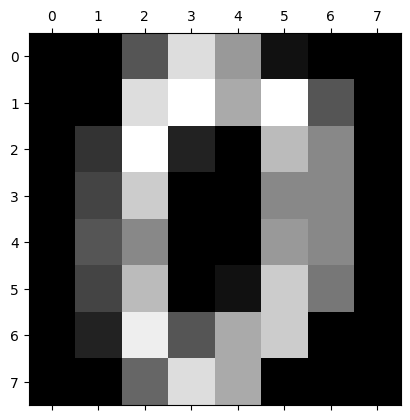

In [9]:
plt.matshow(digits.images[0])

In [10]:
X = digits.data

X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
Y = digits.target
print(Y)
# classes = np.unique(Y)
# print(classes)
# Y = np.eye(Y.max()+1)[Y]
# print(Y)

[0 1 2 ... 8 9 8]


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size = 0.2)
X_train.shape , X_test.shape, Y_train.shape, Y_test.shape


((1437, 64), (360, 64), (1437,), (360,))

In [13]:
ŋ = 0.0001

In [14]:
# forwarding

In [38]:
w1 = np.random.rand(X_train.shape[1],128)
b1 = np.random.rand(1,128)
w2 = np.random.rand(128,32)
b2 = np.random.rand(1,32)
w3 = np.random.rand(32,10)
b3 = np.random.rand(1,10)
epochs = 60
losses = []
acc_train = []
for epoch in range(epochs):
  Y_pred = []

  for x, y in tqdm(zip(X_train, Y_train)):
    #forward

    H1 = sigmoid(x @ w1 + b1)

    H2 = sigmoid(H1 @ w2 + b2)

    H3 = softmax(H2 @ w3 + b3)

    y_pred = H3

    Y_pred.append(np.argmax(y_pred))

    #backward
    grad_error = -2 * (y - y_pred)
    # print(grad_error.shape)
    #layer3
    grad_error = -2 * (y - y_pred)

    grad_w3 = grad_error.T @ H2
    grad_b3 = grad_error

    #layer2
    grad_error =  grad_error @ w3.T @ H2.T  @ (1 - H2)

    grad_w2 = grad_error.T @ H1
    grad_b2 = grad_error

    #layer1
    grad_error = grad_error @ w2.T  @ H1.T @ (1 - H1)
    # print(grad_error.shape)
    x = x.reshape(-1,1)
    grad_w1 = x @ grad_error
    grad_b1 = grad_error

    # update
    w1 -= ŋ * grad_w1
    b1 -= ŋ * grad_b1
    w2 -= ŋ * grad_w2.T
    b2 -= ŋ * grad_b2
    w3 -= ŋ * grad_w3.T
    b3 -= ŋ * grad_b3

  Y_pred = np.array(Y_pred)
  # Y_pred = Y_pred.reshape(1437,-1)
  # Y_pred = np.squeeze(Y_pred)
  # print("Y_pred.shape", Y_pred.shape)

  loss_train = root_mean_square_error(Y_train, Y_pred)
  # print("Y_pred", Y_pred)
  # print("Y_train", Y_train)

  accuracy_train =np.sum(Y_train==Y_pred)
  acc_train.append(accuracy_train)
  # print(np.argmax(Y_pred,axis=1))
  # print(np.argmax(Y_train,axis=1))
  losses.append(loss_train)
  # print(losses)
  # print(accuracy_train)



1437it [00:00, 5798.45it/s]
360it [00:00, 19004.79it/s]


[5.016573442682122]


1437it [00:00, 5570.39it/s]
360it [00:00, 9398.77it/s]


[5.0164451610972405]


1437it [00:00, 5790.76it/s]
360it [00:00, 23481.79it/s]


[5.0164221961916775]


1437it [00:00, 5625.40it/s]
360it [00:00, 21061.62it/s]


[5.016418239863236]


1437it [00:00, 5318.28it/s]
360it [00:00, 20342.87it/s]


[5.016417606142702]


1437it [00:00, 5043.66it/s]
360it [00:00, 20094.35it/s]


[5.016417508472986]


1437it [00:00, 5598.84it/s]
360it [00:00, 21889.99it/s]


[5.016417493666876]


1437it [00:00, 4075.45it/s]
360it [00:00, 13734.43it/s]


[5.016417491437229]


1437it [00:00, 3047.05it/s]
360it [00:00, 14058.07it/s]


[5.0164174911023425]


1437it [00:00, 3393.50it/s]
360it [00:00, 12567.20it/s]


[5.016417491052096]


1437it [00:00, 3158.88it/s]
360it [00:00, 13676.33it/s]


[5.0164174910445585]


1437it [00:00, 3289.90it/s]
360it [00:00, 14227.89it/s]


[5.016417491043429]


1437it [00:00, 3156.04it/s]
360it [00:00, 12101.18it/s]


[5.016417491043259]


1437it [00:00, 3246.44it/s]
360it [00:00, 10792.68it/s]


[5.016417491043233]


1437it [00:00, 4296.19it/s]
360it [00:00, 20613.08it/s]


[5.01641749104323]


1437it [00:00, 5462.71it/s]
360it [00:00, 21841.23it/s]


[5.016417491043229]


0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
565it [00:00, 5640.98it/s]<ipython-input-6-ef044ce6b144>:5: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x))
<ipython-input-6-ef044ce6b144>:5: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x))
1437it [00:00, 5461.69it/s]
360it [00:00, 20896.64it/s]


[nan]


1437it [00:00, 5505.79it/s]
360it [00:00, 22704.30it/s]


[nan]


1437it [00:00, 5531.51it/s]
360it [00:00, 22998.59it/s]


[nan]


1437it [00:00, 5777.46it/s]
360it [00:00, 21276.78it/s]


[nan]


1437it [00:00, 5584.42it/s]
360it [00:00, 22735.07it/s]


[nan]


1437it [00:00, 5517.61it/s]
360it [00:00, 22014.13it/s]


[nan]


1437it [00:00, 5483.48it/s]
360it [00:00, 24323.81it/s]


[nan]


1437it [00:00, 5904.23it/s]
360it [00:00, 17942.69it/s]


[nan]


1437it [00:00, 5837.32it/s]
360it [00:00, 21774.77it/s]


[nan]


1437it [00:00, 5443.40it/s]
360it [00:00, 22408.46it/s]


[nan]


1437it [00:00, 5723.28it/s]
360it [00:00, 23840.30it/s]


[nan]


1437it [00:00, 5875.13it/s]
360it [00:00, 22804.43it/s]


[nan]


1437it [00:00, 5696.76it/s]
360it [00:00, 22487.89it/s]


[nan]


1437it [00:00, 5384.26it/s]
360it [00:00, 22491.91it/s]


[nan]


1437it [00:00, 5930.26it/s]
360it [00:00, 21403.15it/s]


[nan]


1437it [00:00, 5840.61it/s]
360it [00:00, 19445.83it/s]


[nan]


1437it [00:00, 5173.76it/s]
360it [00:00, 20962.79it/s]


[nan]


1437it [00:00, 5676.96it/s]
360it [00:00, 23119.02it/s]


[nan]


1437it [00:00, 5873.83it/s]
360it [00:00, 22863.13it/s]


[nan]


1437it [00:00, 5595.82it/s]
360it [00:00, 20534.31it/s]


[nan]


1437it [00:00, 5408.95it/s]
360it [00:00, 21993.61it/s]


[nan]


1437it [00:00, 5852.32it/s]
360it [00:00, 22703.96it/s]


[nan]


1437it [00:00, 5678.02it/s]
360it [00:00, 21955.88it/s]


[nan]


1437it [00:00, 5498.46it/s]
360it [00:00, 11367.45it/s]


[nan]


1437it [00:00, 5624.72it/s]
360it [00:00, 22621.30it/s]


[nan]


1437it [00:00, 5948.37it/s]
360it [00:00, 21793.94it/s]


[nan]


1437it [00:00, 5529.99it/s]
360it [00:00, 17522.51it/s]


[nan]


1437it [00:00, 5396.13it/s]
360it [00:00, 24343.03it/s]


[nan]


1437it [00:00, 5691.91it/s]
360it [00:00, 17054.83it/s]


[nan]


1437it [00:00, 5513.00it/s]
360it [00:00, 21596.31it/s]


[nan]


1437it [00:00, 4938.00it/s]
360it [00:00, 19289.82it/s]


[nan]


1437it [00:00, 5323.63it/s]
360it [00:00, 20829.76it/s]


[nan]


1437it [00:00, 4823.60it/s]
360it [00:00, 12406.12it/s]


[nan]


1437it [00:00, 3005.71it/s]
360it [00:00, 12663.96it/s]


[nan]


1437it [00:00, 2916.51it/s]
360it [00:00, 14148.57it/s]


[nan]


1437it [00:00, 3053.28it/s]
360it [00:00, 12366.40it/s]


[nan]


1437it [00:00, 3205.97it/s]
360it [00:00, 11349.25it/s]


[nan]


1437it [00:00, 3198.78it/s]
360it [00:00, 12158.19it/s]


[nan]


1437it [00:00, 3196.03it/s]
360it [00:00, 13833.20it/s]


[nan]


1437it [00:00, 3965.92it/s]
360it [00:00, 22853.09it/s]


[nan]


1437it [00:00, 5377.33it/s]
360it [00:00, 22045.63it/s]


[nan]


1437it [00:00, 5632.41it/s]
360it [00:00, 20721.71it/s]


[nan]


1437it [00:00, 5735.07it/s]
360it [00:00, 18541.55it/s]


[nan]


1437it [00:00, 5464.14it/s]
360it [00:00, 19520.50it/s]

[nan]


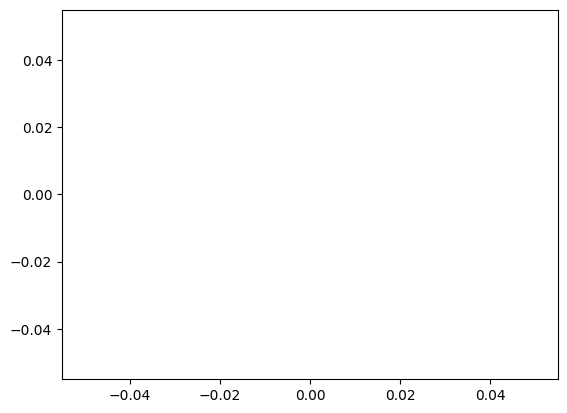

In [35]:
plt.plot(losses_test)


In [17]:
print(Y_test.shape)

(360,)


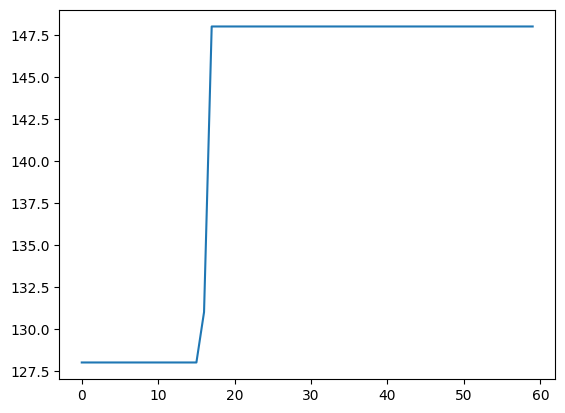

In [157]:
plt.plot(acc_train)

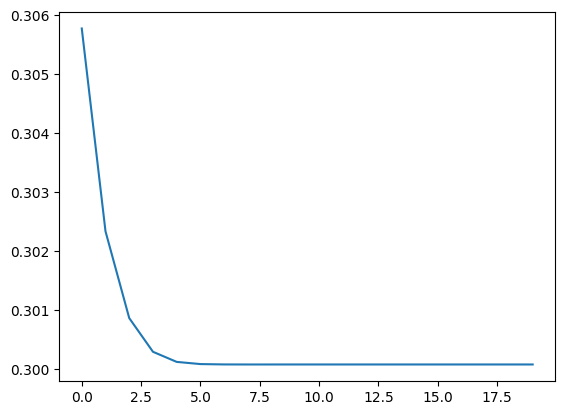

In [124]:
plt.plot(losses)

1437it [00:00, 22488.27it/s]


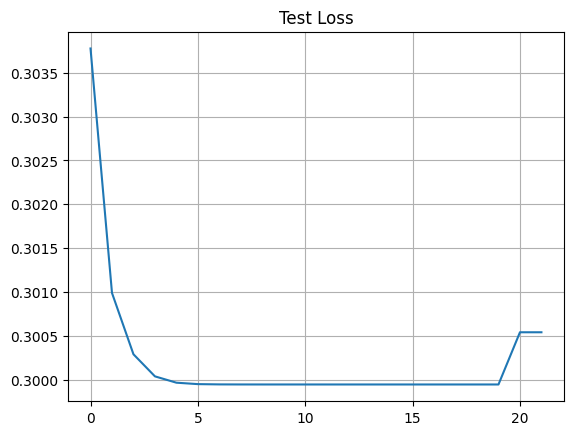

In [58]:

Y_pred_test = []
for x, y in tqdm(zip(X_train, Y_train)):

  H1 = sigmoid(x @ w1 + b1)

  H2 = sigmoid(H1 @ w2 + b2)

  H3 = softmax(H2 @ w3 + b3)

  y_pred_test = H3

  Y_pred_test.append(y_pred_test)

losses.append(root_mean_square_error(Y_test,Y_pred_test))
plt.plot(losses)
plt.title("Test Loss")
plt.grid(True)
plt.show()





In [ ]:
# predict
